# FRL Fake News Capstone Notebook part 1

In [1]:

!pip install s3fs # Needed so that pandas can read and right to s3. pandas uses s3fs for handling S3 connections 
#!pip install unicodedata2 # needed to remove accented characters
#!pip install spacy
#!pip install wordcloud # to generate word cloud
#!pip install gensim
#!python3 -m spacy download en_core_web_sm
#!python3 -m spacy download en

  Using cached s3fs-0.5.1-py3-none-any.whl (21 kB)
  Using cached aiobotocore-1.1.2-py3-none-any.whl (45 kB)
  Using cached fsspec-0.8.4-py3-none-any.whl (91 kB)
  Using cached aioitertools-0.7.1-py3-none-any.whl (20 kB)
  Using cached aiohttp-3.7.2-cp37-cp37m-manylinux2014_x86_64.whl (1.3 MB)
  Using cached botocore-1.17.44-py2.py3-none-any.whl (6.5 MB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached yarl-1.6.2-cp37-cp37m-manylinux2014_x86_64.whl (295 kB)
  Using cached async_timeout-3.0.1-py3-none-any.whl (8.2 kB)
  Using cached multidict-5.0.0-cp37-cp37m-manylinux2014_x86_64.whl (142 kB)
ERROR: boto3 1.16.0 has requirement botocore<1.20.0,>=1.19.0, but you'll have botocore 1.17.44 which is incompatible.
ERROR: awscli 1.18.160 has requirement botocore==1.19.0, but you'll have botocore 1.17.44 which is incompatible.
  Attempting uninstall: botocore
    Found existing installation: botocore 1.19.0
    Uninstalling botocore-1.19.0:
      Successfully uni

# Loading libraries and configuration setup

**First, writing a python script (function) that contains dictionary of contractions to expand contraction found in the text**

In [2]:
%%writefile contractions.py
# Dictionary of English Contractions

CONTRACTION_DICT = { "ain't": "is not",
                    "aren't": "are not",
                    "can't": "cannot",
                    "can't've": "cannot have",
                    "'cause": "because",
                    "could've": "could have",
                    "couldn't": "could not",
                    "couldn't've": "could not have",
                    "didn't": "did not",
                    "doesn't": "does not",
                    "don't": "do not",
                    "hadn't": "had not",
                    "hadn't've": "had not have",
                    "hasn't": "has not",
                    "haven't": "have not",
                    "he'd": "he would",
                    "he'd've": "he would have",
                    "he'll": "he will",
                    "he'll've": "he he will have",
                    "he's": "he is",
                    "how'd": "how did",
                    "how'd'y": "how do you",
                    "how'll": "how will",
                    "how's": "how is",
                    "I'd": "I would",
                    "I'd've": "I would have",
                    "I'll": "I will",
                    "I'll've": "I will have",
                    "I'm": "I am",
                    "I've": "I have",
                    "i'd": "i would",
                    "i'd've": "i would have",
                    "i'll": "i will",
                    "i'll've": "i will have",
                    "i'm": "i am",
                    "i've": "i have",
                    "isn't": "is not",
                    "it'd": "it would",
                    "it'd've": "it would have",
                    "it'll": "it will",
                    "it'll've": "it will have",
                    "it's": "it is",
                    "let's": "let us",
                    "ma'am": "madam",
                    "mayn't": "may not",
                    "might've": "might have",
                    "mightn't": "might not",
                    "mightn't've": "might not have",
                    "must've": "must have",
                    "mustn't": "must not",
                    "mustn't've": "must not have",
                    "needn't": "need not",
                    "needn't've": "need not have",
                    "o'clock": "of the clock",
                    "oughtn't": "ought not",
                    "oughtn't've": "ought not have",
                    "shan't": "shall not",
                    "sha'n't": "shall not",
                    "shan't've": "shall not have",
                    "she'd": "she would",
                    "she'd've": "she would have",
                    "she'll": "she will",
                    "she'll've": "she will have",
                    "she's": "she is",
                    "should've": "should have",
                    "shouldn't": "should not",
                    "shouldn't've": "should not have",
                    "so've": "so have",
                    "so's": "so as",
                    "that'd": "that would",
                    "that'd've": "that would have",
                    "that's": "that is",
                    "there'd": "there would",
                    "there'd've": "there would have",
                    "there's": "there is",
                    "they'd": "they would",
                    "they'd've": "they would have",
                    "they'll": "they will",
                    "they'll've": "they will have",
                    "they're": "they are",
                    "they've": "they have",
                    "to've": "to have",
                    "wasn't": "was not",
                    "we'd": "we would",
                    "we'd've": "we would have",
                    "we'll": "we will",
                    "we'll've": "we will have",
                    "we're": "we are",
                    "we've": "we have",
                    "weren't": "were not",
                    "what'll": "what will",
                    "what'll've": "what will have",
                    "what're": "what are",
                    "what's": "what is",
                    "what've": "what have",
                    "when's": "when is",
                    "when've": "when have",
                    "where'd": "where did",
                    "where's": "where is",
                    "where've": "where have",
                    "who'll": "who will",
                    "who'll've": "who will have",
                    "who's": "who is",
                    "who've": "who have",
                    "why's": "why is",
                    "why've": "why have",
                    "will've": "will have",
                    "won't": "will not",
                    "won't've": "will not have",
                    "would've": "would have",
                    "wouldn't": "would not",
                    "wouldn't've": "would not have",
                    "y'all": "you all",
                    "y'all'd": "you all would",
                    "y'all'd've": "you all would have",
                    "y'all're": "you all are",
                    "y'all've": "you all have",
                    "you'd": "you would",
                    "you'd've": "you would have",
                    "you'll": "you will",
                    "you'll've": "you will have",
                    "you're": "you are",
                    "you've": "you have"
                    }


Overwriting contractions.py


### Only the following modules are needed 

1. pandas
2. matplotlib
3. numpy


In [3]:
#import all needed libraries and perform required configuration setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import csv
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
import seaborn as sns
import re
import s3fs
import boto3
import string
from io import StringIO
import spacy
from spacy.lang import punctuation
import unicodedata2
from contractions import CONTRACTION_DICT
#from html.parser import HTMLParser
#from pathlib import Path
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
from nltk.tokenize import ToktokTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk import FreqDist
from nltk import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.util import ngrams
from collections import defaultdict
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from gensim.models import word2vec
from gensim.models.fasttext import FastText
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import preprocess_string
from gensim.parsing.preprocessing import STOPWORDS


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(style='darkgrid',palette='Dark2',rc={'figure.figsize':(9,6),'figure.dpi':100})

tokenizer = ToktokTokenizer()
punctuation = string.punctuation + '”' + '“' + '–' + '““' + "’’" + '”'
stopword = stopwords.words('english')
wordnet_lemmatizer = WordNetLemmatizer()
stop=set(stopwords.words('english'))
snowball_stemmer = SnowballStemmer('english')
stopwords = set(STOPWORDS)
nlp = spacy.load('en',parse=True,tag=True, entity=True)
# if you get error from the above , you will need to install the following to stage the proper file:
#python -m spacy download en_core_web_sm
#python -m spacy download en

/opt/conda/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### CSV field limit 
**While trying to read the dataset using pandas, there was a `csv.Error` complaining about field larger than field limit (131072)**

**field larger than field limit (131072)**

The csv file contain very huge fields, therefore the `field_size_limit` need to be increased:

**Below is to check the current limit**

`csv.field_size_limit()`

**In order to address the error, the `csv_size_limit` need to be increased using the following script**

In [4]:
maxInt = sys.maxsize

while True:
    # decrease the maxInt value by factor 10 
    # as long as the OverflowError occurs.

    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
        maxInt = int(maxInt/10)

This code above was obtained from slackoverflow blog. It can also be found on this Fake News Capstone project github https://github.com/sandgate-dev/news-content-capstone-project/blob/master/03_data_modeling.ipynb

In [5]:
#check the new field size limit
csv.field_size_limit()

9223372036854775807

## Reading in the fake news corpus in chunk

In [6]:
#Path to the huge csv file
input_data = 's3://sagemaker-studio-zvdmh7fos3/news_cleaned_2018_02_13.csv'

In [7]:
chunksize = 500000 # 500 thousand rows at one go.

In [8]:
%%time

df_list = [] # list to hold the batch dataframe
for chunk in tqdm (pd.read_csv(input_data, chunksize=chunksize, encoding='utf-8', engine='python')):
    # append the chunk to list 
    df_list.append(chunk)

18it [25:46, 85.91s/it]

CPU times: user 10min 16s, sys: 1min 43s, total: 12min
Wall time: 25min 46s


In [9]:
%%time
# Merge all the chunked dataframes into one dataframe
df = pd.concat(df_list)

# Delete the chunked dataframe list to release memory
del df_list

# See what we have loaded
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8529090 entries, 0 to 8529089
Data columns (total 17 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Unnamed: 0        object 
 1   id                object 
 2   domain            object 
 3   type              object 
 4   url               object 
 5   content           object 
 6   scraped_at        object 
 7   inserted_at       object 
 8   updated_at        object 
 9   title             object 
 10  authors           object 
 11  keywords          float64
 12  meta_keywords     object 
 13  meta_description  object 
 14  tags              object 
 15  summary           float64
 16  source            object 
dtypes: float64(2), object(15)
memory usage: 1.1+ GB
CPU times: user 9.09 s, sys: 2.42 s, total: 11.5 s
Wall time: 11.5 s


# Examining the dataset

**The data contains 17 columns and 9 million rows**

From the `README` provided on the original repo, the columns `type` and `tags` are the same because they represent the same classification of the content

In [10]:
# Some few rows at the begining of the dataframe
df.head(20)


,Unnamed: 0,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source
0,0,2,express.co.uk,rumor,https://www.express.co.uk/news/science/738402/...,"Life is an illusion, at least on a quantum lev...",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Is life an ILLUSION? Researchers prove 'realit...,Sean Martin,NaN,[''],THE UNIVERSE ceases to exist when we are not l...,NaN,NaN,NaN
1,1,6,barenakedislam.com,hate,http://barenakedislam.com/category/donald-trum...,"Unfortunately, he hasn’t yet attacked her for ...",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Donald Trump,"Linda Rivera, Conrad Calvano, Az Gal, Lincoln ...",NaN,[''],NaN,NaN,NaN,NaN
2,2,7,barenakedislam.com,hate,http://barenakedislam.com/category/donald-trum...,The Los Angeles Police Department has been den...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Donald Trump,"Linda Rivera, Conrad Calvano, Az Gal, Lincoln ...",NaN,[''],NaN,NaN,NaN,NaN
3,3,8,barenakedislam.com,hate,http://barenakedislam.com/2017/12/24/more-winn...,The White House has decided to quietly withdra...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,"MORE WINNING! Israeli intelligence source, DEB...","Cleavis Nowell, Cleavisnowell, Clarence J. Fei...",NaN,[''],NaN,NaN,NaN,NaN
4,4,9,barenakedislam.com,hate,http://barenakedislam.com/2017/12/25/oh-trump-...,“The time has come to cut off the tongues of t...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,"“Oh, Trump, you coward, you just wait, we will...","F.N. Lehner, Don Spilman, Clarence J. Feinour,...",NaN,[''],NaN,NaN,NaN,NaN
5,5,10,barenakedislam.com,hate,http://barenakedislam.com/2017/12/27/following...,The Central American nation and six other stat...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Following Guatemala’s decision to move its emb...,"Pamela Jeffersons, Cleavis Nowell, Cleavisnowe...",NaN,[''],NaN,NaN,NaN,NaN
6,6,11,blackagendareport.com,unreliable,https://blackagendareport.com/un-backed-police...,UN-Backed Police Massacred Haitians With Impun...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,UN-Backed Police Massacred Haitians With Impunity,"Akinyele Umoja, Glen Ford, Bar Executive Edito...",NaN,[''],"“When the police finally left the campus, arou...",NaN,NaN,NaN
7,7,13,blackagendareport.com,unreliable,https://blackagendareport.com/articlelist/inte...,It should have come as no surprise that the sa...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Black Agenda Report,"Nellie Bailey, Glen Ford, Margaret Kimberley, ...",NaN,[''],NaN,NaN,NaN,NaN
8,8,14,blackagendareport.com,unreliable,https://blackagendareport.com/articlelist/inte...,"“When the police finally left the campus, arou...",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Black Agenda Report,"Ann Garrison, Bar Contributor, Ken Morgan, Jem...",NaN,[''],NaN,NaN,NaN,NaN
9,9,15,blackagendareport.com,unreliable,https://blackagendareport.com/zambia-must-clar...,Zambia Must Clarify Whether It Will Host Israe...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Zambia Must Clarify Whether It Will Host Israe...,"Glen Ford, Bar Executive Editor, Margaret Kimb...",NaN,[''],“Israel since 1948 has collaborated with the s...,NaN,NaN,NaN


In [11]:
# The bottom part of the dataframe
df.tail(20)

,Unnamed: 0,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source
8529070,8936,9878277,nytimes.com,reliable,https://www.nytimes.com/2018/02/06/opinion/isr...,"Back then, Israel also had a right-wing leader...",2018-02-11 00:49:52.101730,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,Everyone Is Going All the Way,Thomas L. Friedman,NaN,"['Palestinians', 'United States Politics and G...","There’s a recurring theme in Israel, Washingto...",NaN,NaN,nytimes
8529071,8937,9878278,nytimes.com,reliable,https://www.nytimes.com/2018/02/06/sports/foot...,Photo\n\nEveryone seems to have a theory as to...,2018-02-11 00:49:52.102101,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,Malcolm Butler of the Patriots Denies Wild Sup...,Benjamin Hoffman,NaN,"['Football', 'Super Bowl', 'New England Patrio...","Butler did not play in Super Bowl LII, but he ...",NaN,NaN,nytimes
8529072,8938,9878279,nytimes.com,reliable,https://www.nytimes.com/2018/02/06/sports/base...,“There is a rising tide among players for radi...,2018-02-11 00:49:52.102476,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,Baseball and Union Point Fingers Over Free-Age...,"Tyler Kepner, On Baseball",NaN,"['Baseball', 'Free Agents (Sports)', 'Major Le...",As front offices increasingly rely on analytic...,NaN,NaN,nytimes
8529073,8939,9878280,nytimes.com,reliable,https://www.nytimes.com/2018/02/06/us/politics...,Photo\n\nWASHINGTON — The Supreme Court partly...,2018-02-11 00:49:52.103023,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,Supreme Court Issues Partial Stay in North Car...,Adam Liptak,NaN,"['Redistricting and Reapportionment', 'State L...",In the latest battle in the voting wars in Nor...,NaN,NaN,nytimes
8529074,8940,9878281,nytimes.com,reliable,https://www.nytimes.com/2018/02/06/todayspaper...,“One hundred years in the context of history i...,2018-02-11 00:49:52.103109,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,Quotation of the Day: British See More to Do o...,NaN,NaN,[''],"Quotation of the Day for Wednesday, February 7...",NaN,NaN,nytimes
8529075,8941,9878282,nytimes.com,reliable,https://www.nytimes.com/2018/02/06/business/me...,“We don’t really have any update on the regula...,2018-02-11 00:49:52.103441,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,Disney Reports Mixed Earnings and a Full Proje...,Brooks Barnes,NaN,"['Company Reports', 'Walt Disney Company', 'Ig...",Disney is pursuing new growth by buying most o...,NaN,NaN,nytimes
8529076,8942,9878283,nytimes.com,reliable,https://www.nytimes.com/2018/02/06/nyregion/ho...,"“Down to the wire,” Mr. Percoco wrote again, i...",2018-02-11 00:49:52.103997,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,"In Albany, Percoco Secretly Strained to Keep t...","Jesse Mckinley, Benjamin Weiser",NaN,"['Corruption (Institutional)', 'Bribery and Ki...",When a deteriorating relationship threatened t...,NaN,NaN,nytimes
8529077,8943,9878284,nytimes.com,reliable,https://www.nytimes.com/2018/02/06/us/politics...,The letter said the Justice Department’s initi...,2018-02-11 00:49:52.104494,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,Senate Letter Echoes House Republicans’ Accusa...,"Maggie Haberman, Sharon Lafraniere, Michael D....",NaN,"['United States Politics and Government', 'For...",President Trump is expected to release a class...,NaN,NaN,nytimes
8529078,8944,9878285,nytimes.com,reliable,https://www.nytimes.com/2018/02/06/technology/...,Mr. Kalanick said he and other Uber executives...,2018-02-11 00:49:52.104984,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,"In Waymo-Uber Trial, Kalanick Recalls ‘Jam Ses...",Daisuke Wakabayashi,NaN,"['Uber Technologies Inc', 'Waymo', 'Driverless...","Were Uber executives, including the former chi...",NaN,NaN,nytimes
8529079,8945,9878286,nytimes.com,reliable,https://www.nytimes.com/2018/02/06/world/middl...,Mr. Moumtzis called the lack of aid delivery a...,2018-02

In [12]:
# length of the dataframe and the type column
print(len(df))
print(len(df['type']))

8529090
8529090


### Checking the missing values 

In [13]:
def missing_value(df):
    """" Function to calculate the number and percent of missing values in a dataframe"""
    total = df.isnull().sum().sort_values(ascending=False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
    missing_value = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
    return missing_value

In [14]:
# check and print out the missing values in the data
missing_value(df)

,Total,Percent
keywords,8529090,100.000000
summary,8529090,100.000000
source,6648509,77.950977
tags,6560614,76.920445
meta_description,4481955,52.549041
authors,3791648,44.455481
type,403332,4.728898
meta_keywords,338030,3.963260
title,73368,0.860209
scraped_at,147,0.001724


**Looking at the title column**

In [15]:
for index,text in enumerate(df['title'][0:10]):
    print('Title %d:\n'%(index+1),text, '\n')

Title 1:
 Is life an ILLUSION? Researchers prove 'reality doesn't exist if you're not looking at it' 

Title 2:
 Donald Trump 

Title 3:
 Donald Trump 

Title 4:
 MORE WINNING! Israeli intelligence source, DEBKAfile, confirms the Trump Administration to cut off ties with the Palestinians, which means no peace plan, no more financial aid 

Title 5:
 “Oh, Trump, you coward, you just wait, we will dig your grave by means of the Islamic Caliphate” 

Title 6:
 Following Guatemala’s decision to move its embassy to Jerusalem, the capital of Israel, 10 MORE countries are also considering the move 

Title 7:
 UN-Backed Police Massacred Haitians With Impunity 

Title 8:
 Black Agenda Report 

Title 9:
 Black Agenda Report 

Title 10:
 Zambia Must Clarify Whether It Will Host Israel-Africa Summit 



In [16]:
for index,text in enumerate(df['title'][-10:]):
    print('Title %d:\n'%(index+1),text, '\n')

Title 1:
 Eric Holder’s Group Targets All-G.O.P. States to Attack Gerrymandering 

Title 2:
 Snap Reverses Slide as User Growth and Revenue Jump 

Title 3:
 Do You Think Donald Trump Is Ready for a Real Financial Crisis? 

Title 4:
 Protesters in South Sudan Denounce U.S. Arms Embargo 

Title 5:
 Idaho Stripped Climate Change From School Guidelines. Now, It’s a Battle.  

Title 6:
 Corruption With a Chance of Meatballs 

Title 7:
 Volatility Rattles Stocks, and Investors Who Bet on a Continuing Calm 

Title 8:
 As 4 of 5 in Public Housing Lost Heat, a Demand for an Apology Is Unfulfilled 

Title 9:
 Who Said It: Pepé Le Pew or Donald Trump? 

Title 10:
 Toads Eat Beetles. Sometimes, Beetles Make Them Regret Their Meal Choice. 



**Looking at the content column**

In [17]:
for index,text in enumerate(df['content'][0:10]):
    print('Content %d:\n'%(index+1),text, '\n')

Content 1:
 Life is an illusion, at least on a quantum level, in a theory which has recently been confirmed by a set of researchers.

They finally have the means to test John Wheeler’s delayed-choice theory and concluded that the physicist was right.

In 1978, Mr Wheeler’s proposed experiment involved a moving object that was given the choice to act like a wave or a particle – the former acting as a vibration with a frequency that can distinguish it from other waves and the latter having no frequency that you can determine its position in space, unlike a wave – and at what point does it ‘decide’ to act like one or the other.

At the time, the technology was not available to conduct a strong experiment, but scientists have now been able to carry it out. 

Content 2:
 Unfortunately, he hasn’t yet attacked her for Islamic terrorism-connections, but we know he will. Below are several links that explain in detail why having Huma Abedin anywhere near the White House would be like inviting in

In [18]:
for index,text in enumerate(df['content'][-5:]):
    print('Content %d:\n'%(index+1),text, '\n')

Content 1:
 Photo

Man does not live by bread alone, it says in the Bible, and that is certainly true for some politicians accused of corruption. They also live by pasta, meatballs, rice balls, jam, tea and wine, among other comestibles. Food and drink as code words for bribes are hard-wired into the language of many cultures, and several criminal cases of late offer a spicy taste.

A federal corruption trial is underway in New York for Joseph Percoco, a close ally and family friend of Gov. Andrew Cuomo. Among the allegations is that Mr. Percoco, with all the eloquence of Tony Soprano and his associates, referred to bribe money as boxes of “ziti.”

In Pennsylvania, the mayor of Allentown, Ed Pawlowski, is fending off bribery, fraud and conspiracy charges. His federal case turns in part on whether recorded conversations about picking up “meatballs” meant collecting payoffs or actually getting ready to eat. Then there’s the approaching trial of a Maryland state senator, Nathaniel Oaks, w

## Observations from initial exploration of the data

1. There seems to be accented characters in the text data
2. special characters also present
3. Lot of missing values
4. the `domain` and `url` columns seems to present the same thing. If you look at the README in the Fake News Corpus repo. Domain should be more useful
5. newlines and whitespaces are also present throughout the text


## Examining some other columns. 

In [19]:
# looking at the authors column
df['authors'].unique()

array(['Sean Martin',
       'Linda Rivera, Conrad Calvano, Az Gal, Lincoln Applegate Hahn, Kevin Collins, Jesus Rivera',
       'Cleavis Nowell, Cleavisnowell, Clarence J. Feinour, Don Spilman, Jay Dillon, Al Dajjal, Linda Rivera, Conrad Calvano, Az Gal, Lincoln Applegate Hahn',
       ..., 'Sarah Sweeney, Metropolitan Diary',
       'Maggie Astor, Julie Creswell',
       'Maggie Haberman, Sharon Lafraniere, Michael D. Shear'],
      dtype=object)

### convert the dates to datetime and check for the min and max dates in the dataset

In [20]:
df['scraped_at'] = pd.to_datetime(df['scraped_at'], utc=True)
df['updated_at'] = pd.to_datetime(df['updated_at'])
df['inserted_at'] = pd.to_datetime(df['inserted_at'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8529090 entries, 0 to 8529089
Data columns (total 17 columns):
 #   Column            Dtype              
---  ------            -----              
 0   Unnamed: 0        object             
 1   id                object             
 2   domain            object             
 3   type              object             
 4   url               object             
 5   content           object             
 6   scraped_at        datetime64[ns, UTC]
 7   inserted_at       datetime64[ns]     
 8   updated_at        datetime64[ns]     
 9   title             object             
 10  authors           object             
 11  keywords          float64            
 12  meta_keywords     object             
 13  meta_description  object             
 14  tags              object             
 15  summary           float64            
 16  source            object             
dtypes: datetime64[ns, UTC](1), datetime64[ns](2), float64(2), object(

In [21]:
# printing the min and max dates
print(df['scraped_at'].min(), df['scraped_at'].max())

2016-10-31 22:00:13.187000+00:00 2018-02-11 00:49:52.112447+00:00


In [22]:
# printing the min and max dates
print(df['updated_at'].min(), df['updated_at'].max())

2018-02-02 01:19:41.756664 2018-02-11 00:14:20.346871


In [23]:
# printing the min and max dates
print(df['inserted_at'].min(), df['inserted_at'].max())

2018-02-02 01:19:41.756632 2018-02-11 00:14:20.346838


## Suggestions I have on selecting columns that might be valueable to my model algorithim

**The following columns can be excluded from the datasets with reasons**
1. All the columns with greater than 70% of missing values : `source` , `summary` , `keywords` , `meta_description`
2. The `url` column because it kind of duplicated the `domain` column plus it also contains a lot of missing values
3. The `id` and `Unamed: 0` columns because they are just index of the dataframe and will not contribute anything to our model
4. The dates  `updated_at` and `inserted_at` columns does not seem to be useful at all because the range covers just one day or eleven days at most

## Dropping the unnecessay columns 

In [24]:
# list of columns to drop from the datasets
cols_to_drop = ['id','Unnamed: 0', 'url', 'source', 'summary', 'keywords', 'meta_description','updated_at', 'inserted_at']

In [25]:
# drop the columns and check the memory usage
df.drop(cols_to_drop, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8529090 entries, 0 to 8529089
Data columns (total 8 columns):
 #   Column         Dtype              
---  ------         -----              
 0   domain         object             
 1   type           object             
 2   content        object             
 3   scraped_at     datetime64[ns, UTC]
 4   title          object             
 5   authors        object             
 6   meta_keywords  object             
 7   tags           object             
dtypes: datetime64[ns, UTC](1), object(7)
memory usage: 520.6+ MB


## Further look at the new dataframe

In [26]:
# The first 10 rows of the new dataframe
df.head()

,domain,type,content,scraped_at,title,authors,meta_keywords,tags
0,express.co.uk,rumor,"Life is an illusion, at least on a quantum lev...",2018-01-25 16:17:44.789555+00:00,Is life an ILLUSION? Researchers prove 'realit...,Sean Martin,[''],NaN
1,barenakedislam.com,hate,"Unfortunately, he hasn’t yet attacked her for ...",2018-01-25 16:17:44.789555+00:00,Donald Trump,"Linda Rivera, Conrad Calvano, Az Gal, Lincoln ...",[''],NaN
2,barenakedislam.com,hate,The Los Angeles Police Department has been den...,2018-01-25 16:17:44.789555+00:00,Donald Trump,"Linda Rivera, Conrad Calvano, Az Gal, Lincoln ...",[''],NaN
3,barenakedislam.com,hate,The White House has decided to quietly withdra...,2018-01-25 16:17:44.789555+00:00,"MORE WINNING! Israeli intelligence source, DEB...","Cleavis Nowell, Cleavisnowell, Clarence J. Fei...",[''],NaN
4,barenakedislam.com,hate,“The time has come to cut off the tongues of t...,2018-01-25 16:17:44.789555+00:00,"“Oh, Trump, you coward, you just wait, we will...","F.N. Lehner, Don Spilman, Clarence J. Feinour,...",[''],NaN


In [27]:
# The first 10 rows of the new dataframe
df.tail()

,domain,type,content,scraped_at,title,authors,meta_keywords,tags
8529085,nytimes.com,reliable,"Photo\n\nMan does not live by bread alone, it ...",2018-02-11 00:49:52.109651+00:00,Corruption With a Chance of Meatballs,Clyde Haberman,"['Bribery and Kickbacks', 'Corruption (Institu...",NaN
8529086,nytimes.com,reliable,"VIX, which measures investor expectations that...",2018-02-11 00:49:52.110404+00:00,"Volatility Rattles Stocks, and Investors Who B...",Landon Thomas Jr.,"['Stocks and Bonds', 'Chicago Board Options Ex...",NaN
8529087,nytimes.com,reliable,Housing Authority residents in the audience we...,2018-02-11 00:49:52.111090+00:00,"As 4 of 5 in Public Housing Lost Heat, a Deman...",William Neuman,"['Public and Subsidized Housing', 'Heating', '...",NaN
8529088,nytimes.com,reliable,"He has a curious way of expressing it, though....",2018-02-11 00:49:52.111794+00:00,Who Said It: Pepé Le Pew or Donald Trump?,Jennifer Finney Boylan,"['Cartoons and Cartoonists', 'Looney Tunes', '...",NaN
8529089,nytimes.com,reliable,"Video\n\nFor most prey, the game is over once ...",2018-02-11 00:49:52.112447+00:00,"Toads Eat Beetles. Sometimes, Beetles Make The...",Douglas Quenqua,"['Frogs', 'Beetles', 'Poisoning and Poisons', ...",NaN


**Dropping some other columns**

In [28]:
# drop authors, tags and meta_keywords columns
df.drop(['tags','authors','meta_keywords'], axis=1, inplace=True)

df.tail(5)

,domain,type,content,scraped_at,title
8529085,nytimes.com,reliable,"Photo\n\nMan does not live by bread alone, it ...",2018-02-11 00:49:52.109651+00:00,Corruption With a Chance of Meatballs
8529086,nytimes.com,reliable,"VIX, which measures investor expectations that...",2018-02-11 00:49:52.110404+00:00,"Volatility Rattles Stocks, and Investors Who B..."
8529087,nytimes.com,reliable,Housing Authority residents in the audience we...,2018-02-11 00:49:52.111090+00:00,"As 4 of 5 in Public Housing Lost Heat, a Deman..."
8529088,nytimes.com,reliable,"He has a curious way of expressing it, though....",2018-02-11 00:49:52.111794+00:00,Who Said It: Pepé Le Pew or Donald Trump?
8529089,nytimes.com,reliable,"Video\n\nFor most prey, the game is over once ...",2018-02-11 00:49:52.112447+00:00,"Toads Eat Beetles. Sometimes, Beetles Make The..."


In [29]:
# Checking for nulla values
missing_value(df)

,Total,Percent
type,403332,4.728898
title,73368,0.860209
scraped_at,147,0.001724
content,134,0.001571
domain,121,0.001419


In [30]:
# Drop the remaining null values and check again
df = df.dropna()
missing_value(df)

,Total,Percent
title,0,0.0
scraped_at,0,0.0
content,0,0.0
type,0,0.0
domain,0,0.0


## Checking the number of rows and columns remaining

In [31]:
df.shape
print('The dataframe contains:', df.shape[0] ,'rows', 'and', df.shape[1], 'columns')

The dataframe contains: 8052608 rows and 5 columns


# Dealing with unnecesary text in the title column

In [32]:
# from previous text data exploration, I found some title begin with 'Cable:' and some characters
# Will try to find those rows that has that entry and drop them all
mdf = df[df['title'].str.startswith('Cable:')]

In [33]:
df.drop(mdf.index, inplace=True)
df.tail(15)

,domain,type,content,scraped_at,title
8529075,nytimes.com,reliable,“We don’t really have any update on the regula...,2018-02-11 00:49:52.103441+00:00,Disney Reports Mixed Earnings and a Full Proje...
8529076,nytimes.com,reliable,"“Down to the wire,” Mr. Percoco wrote again, i...",2018-02-11 00:49:52.103997+00:00,"In Albany, Percoco Secretly Strained to Keep t..."
8529077,nytimes.com,reliable,The letter said the Justice Department’s initi...,2018-02-11 00:49:52.104494+00:00,Senate Letter Echoes House Republicans’ Accusa...
8529078,nytimes.com,reliable,Mr. Kalanick said he and other Uber executives...,2018-02-11 00:49:52.104984+00:00,"In Waymo-Uber Trial, Kalanick Recalls ‘Jam Ses..."
8529079,nytimes.com,reliable,Mr. Moumtzis called the lack of aid delivery a...,2018-02-11 00:49:52.105431+00:00,‘Extreme’ Suffering in Syria as Government Ste...
8529080,nytimes.com,reliable,"“From my perspective, success is if you break ...",2018-02-11 00:49:52.106225+00:00,Eric Holder’s Group Targets All-G.O.P. States ...
8529081,nytimes.com,reliable,Photo\n\nSAN FRANCISCO — Snap finally snapped ...,2018-02-11 00:49:52.106675+00:00,Snap Reverses Slide as User Growth and Revenue...
8529082,nytimes.com,reliable,Photo\n\nThe global financial markets are not ...,2018-02-11 00:49:52.107566+00:00,Do You Think Donald Trump Is Ready for a Real ...
8529083,nytimes.com,reliable,"JUBA, South Sudan — Demonstrations in South Su...",2018-02-11 00:49:52.107776+00:00,Protesters in South Sudan Denounce U.S. Arms E...
8529084,nytimes.com,reliable,Idaho Stripped Climate Change From School Guid...,2018-02-11 00:49:52.108715+00:00,Idaho Stripped Climate Change From School Guid...


In [34]:
df.head(10)

,domain,type,content,scraped_at,title
0,express.co.uk,rumor,"Life is an illusion, at least on a quantum lev...",2018-01-25 16:17:44.789555+00:00,Is life an ILLUSION? Researchers prove 'realit...
1,barenakedislam.com,hate,"Unfortunately, he hasn’t yet attacked her for ...",2018-01-25 16:17:44.789555+00:00,Donald Trump
2,barenakedislam.com,hate,The Los Angeles Police Department has been den...,2018-01-25 16:17:44.789555+00:00,Donald Trump
3,barenakedislam.com,hate,The White House has decided to quietly withdra...,2018-01-25 16:17:44.789555+00:00,"MORE WINNING! Israeli intelligence source, DEB..."
4,barenakedislam.com,hate,“The time has come to cut off the tongues of t...,2018-01-25 16:17:44.789555+00:00,"“Oh, Trump, you coward, you just wait, we will..."
5,barenakedislam.com,hate,The Central American nation and six other stat...,2018-01-25 16:17:44.789555+00:00,Following Guatemala’s decision to move its emb...
6,blackagendareport.com,unreliable,UN-Backed Police Massacred Haitians With Impun...,2018-01-25 16:17:44.789555+00:00,UN-Backed Police Massacred Haitians With Impunity
7,blackagendareport.com,unreliable,It should have come as no surprise that the sa...,2018-01-25 16:17:44.789555+00:00,Black Agenda Report
8,blackagendareport.com,unreliable,"“When the police finally left the campus, arou...",2018-01-25 16:17:44.789555+00:00,Black Agenda Report
9,blackagendareport.com,unreliable,Zambia Must Clarify Whether It Will Host Israe...,2018-01-25 16:17:44.789555+00:00,Zambia Must Clarify Whether It Will Host Israe...


## Checking the rows and columns remaining after dropping rows with null values

In [35]:
df.shape
print('The dataframe contains:', df.shape[0] ,'rows', 'and', df.shape[1], 'columns')

The dataframe contains: 7881890 rows and 5 columns


## Checking the number of unique values in the type column

In [36]:
df['type'].value_counts(dropna=False, ascending=False)

reliable      1913205
political     1657089
bias          1138658
fake           894737
conspiracy     759165
rumor          481158
unknown        371433
clickbait      231949
unreliable     127866
junksci        117466
satire         112669
hate            76495
Name: type, dtype: int64

## Confirming the length of the type column and compare it with the number of rows in the precleaned dataframe

In [37]:
len(df['type'])


7881890

## Summation of the counts in the type column


In [38]:
type_count = df['type'].value_counts(dropna=False, ascending=False)
sum(type_count.values)


7881890

## From the metadata provided on the Fake News Corpus repo. The following are the fact

1. `rumor` is not among the classes specified in the `type` or `tags` column
2. We can drop the two classes `rumor` and `unknown` before recoding the classes
3. The group decided that we will only be using two classes `reliable` and `fake`
4. We will drop the other unneeded classes
5. We can recode the remaining class to binary containing only `real` and `fake` news class


## Dropping all the unneeded classes from the df

**Get names of indexes for which column type is equal to rumor, bias, clickbait, junksci, satire, unreliable,
unknown, nan, political. Then drop the rows from the dataframe**

In [39]:
# list of classes in the type column that need to be dropped
classes_to_drop = ['rumor','bias','political','conspiracy','unknown','clickbait','junksci','satire','unreliable','hate']

# Getting the indexes for the classes
index_names = df[ df['type'].isin(classes_to_drop)].index 

# dropping the rows based on the column indexes
df.drop(index_names, inplace = True) 



In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2807942 entries, 27 to 8529089
Data columns (total 5 columns):
 #   Column      Dtype              
---  ------      -----              
 0   domain      object             
 1   type        object             
 2   content     object             
 3   scraped_at  datetime64[ns, UTC]
 4   title       object             
dtypes: datetime64[ns, UTC](1), object(4)
memory usage: 128.5+ MB


In [41]:

df.head()

,domain,type,content,scraped_at,title
27,beforeitsnews.com,fake,Headline: Bitcoin & Blockchain Searches Exceed...,2018-01-25 16:17:44.789555+00:00,Surprise: Socialist Hotbed Of Venezuela Has Lo...
28,beforeitsnews.com,fake,Water Cooler 1/25/18 Open Thread; Fake News ? ...,2018-01-25 16:17:44.789555+00:00,Water Cooler 1/25/18 Open Thread; Fake News ? ...
29,beforeitsnews.com,fake,Veteran Commentator Calls Out the Growing “Eth...,2018-01-25 16:17:44.789555+00:00,Veteran Commentator Calls Out the Growing “Eth...
30,beforeitsnews.com,fake,"Lost Words, Hidden Words, Otters, Banks and Bo...",2018-01-25 16:17:44.789555+00:00,"Lost Words, Hidden Words, Otters, Banks and Books"
31,beforeitsnews.com,fake,Red Alert: Bond Yields Are SCREAMING “Inflatio...,2018-01-25 16:17:44.789555+00:00,Red Alert: Bond Yields Are SCREAMING “Inflatio...


In [42]:
df.shape
print('The dataframe contains:', df.shape[0] ,'rows', 'and', df.shape[1], 'columns')

The dataframe contains: 2807942 rows and 5 columns


## Checking the values in the type column

In [43]:
df['type'].value_counts(dropna=False, ascending=False)

reliable    1913205
fake         894737
Name: type, dtype: int64

## Create a new column called label with binary class **fake** and **real**

In [44]:
#Labeling the class
class_labels = ['fake','real']

#replace the class
df['label'] = df['type'].replace(['fake','reliable'], class_labels)

# check the column values
df['label'].value_counts(dropna=False, ascending=False)

real    1913205
fake     894737
Name: label, dtype: int64

## Visualize the label column

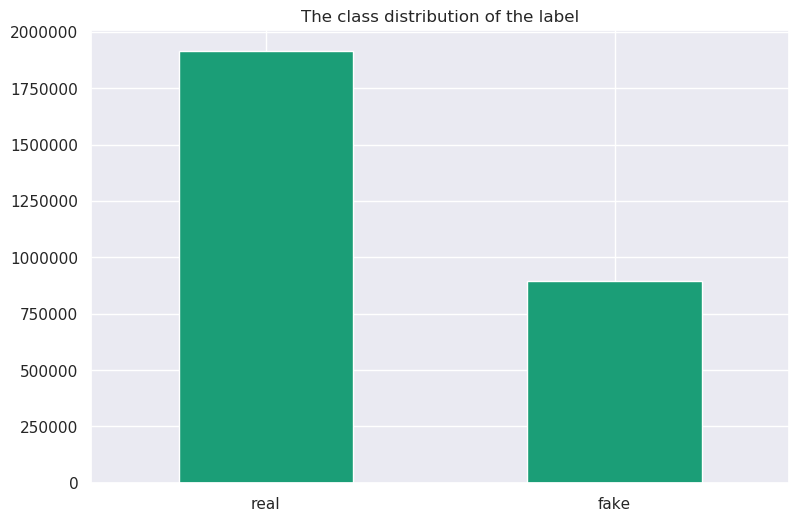

In [45]:
df['label'].value_counts(dropna=False, ascending=False).plot.bar(rot=0, title='The class distribution of the label');

## There is a class imbalance which will create a bias in the model training. We need to Down sample the majority class

In [46]:
# I did not include a seed. Guess there should be one so that we can be able to replicate the sampling
df = df.sample(frac=1)

#Randomly select observations from the real class (the majority class). Tried to use as much as possible from the minority
real = df.loc[df['label']== 'real'].sample(n=894000)

#Randomwly select the same number of observations from the fake class
fake =df.loc[df['label']=='fake'].sample(n=894000)

df = pd.concat([real, fake])

In [47]:
df.head()

,domain,type,content,scraped_at,title,label
7766484,nytimes.com,reliable,One month after a three-judge panel of a feder...,2018-02-11 00:42:14.935145+00:00,Appeal of Challenge to ‘No Child’ Law,real
6845267,www.yahoo.com,reliable,STOCKHOLM (Reuters) - Sweden will seek assuran...,2016-11-11 14:16:53.754000+00:00,Sweden seek assurances from Trump regarding de...,real
8102733,nytimes.com,reliable,"But this week, the bus’s practices gained wide...",2018-02-11 00:45:31.225957+00:00,"At Front of Brooklyn Bus, a Clash of Religious...",real
6917956,www.yahoo.com,reliable,BEIRUT (AP) — The Latest on developments in Sy...,2016-11-08 03:28:07.118000+00:00,The Latest: Turkey: Use of Kurds against IS 'n...,real
6965379,www.sfgate.com,reliable,Hot-shooting Tennessee Tech routs Alabama A&M ...,2016-11-18 22:38:10.550000+00:00,Hot-shooting Tennessee Tech routs Alabama A&M ...,real


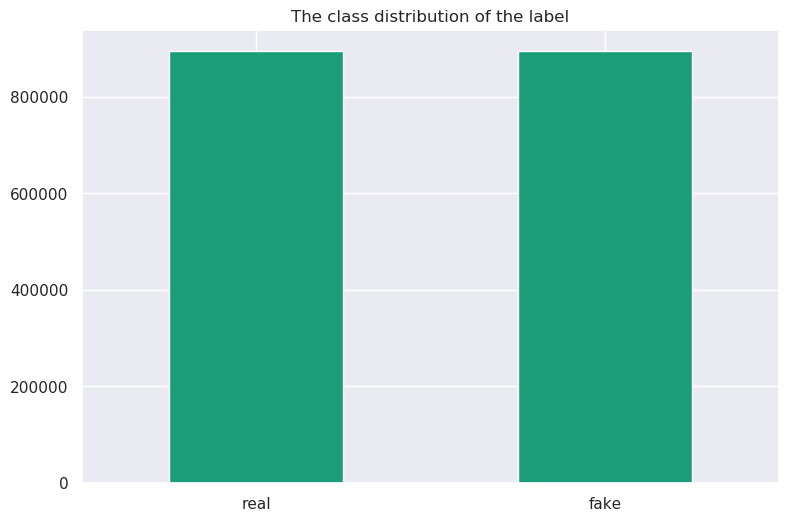

In [48]:
df['label'].value_counts(dropna=False, ascending=False).plot.bar(rot=0, title='The class distribution of the label');

## Saving a dataframe to s3 bucket

> Saving using the boto3 method requires additional memory usage and it crashed the kernel (MemoryError). Decided to use the s3fs method and it worked

**Using `s3fs` module**

In [53]:
import s3fs

s3 = s3fs.S3FileSystem(anon=False) # publicly-available,  # uses default credentials
#s3 = s3fs.S3FileSystem(anon=False) # credentials explicitly supplied
# Use 'w' for py3, 'wb' for py2
with s3.open('osanusi-auto/cleaned_frl_fake2.csv','w') as f:
    df.to_csv(f) # Should have been df.to_csv(f, index=False)
     

**Using `boto3` module**

In [49]:
myBucket = 'osanusi-auto'
file_key = 'cleaned_frl_fake.csv'

In [50]:
def write_dataframe_to_csv_on_s3(dataframe, file_key):
    """ Write a dataframe to a CSV on S3 """
    """Sends csv to S3 from memory"""
    print("Writing {} records to {}".format(len(dataframe), file_key))
     # Create buffer
    csv_buffer = StringIO()
    # Write dataframe to buffer
    dataframe.to_csv(csv_buffer, index=False)
    # Create S3 object
    s3_resource = boto3.resource("s3")
    # Write buffer to S3 object
    s3_resource.Object(myBucket, file_key).put(Body=csv_buffer.getvalue())

In [51]:
write_dataframe_to_csv_on_s3(df, 'cleaned_frl_fake.csv')

Writing 1788000 records to cleaned_frl_fake.csv


MemoryError: 

> Saving using the boto3 method requires additional memory usage and it crashed the kernel (MemoryError). Decided to use the s3fs method and it worked

## Test the save csv file by reading and printing out the head

In [54]:
test_path =  's3://osanusi-auto/cleaned_frl_fake2.csv'

In [55]:
test = pd.read_csv(test_path, nrows=50)
test.head()

,Unnamed: 0,domain,type,content,scraped_at,title,label
0,7766484,nytimes.com,reliable,One month after a three-judge panel of a feder...,2018-02-11 00:42:14.935145+00:00,Appeal of Challenge to ‘No Child’ Law,real
1,6845267,www.yahoo.com,reliable,STOCKHOLM (Reuters) - Sweden will seek assuran...,2016-11-11 14:16:53.754000+00:00,Sweden seek assurances from Trump regarding de...,real
2,8102733,nytimes.com,reliable,"But this week, the bus’s practices gained wide...",2018-02-11 00:45:31.225957+00:00,"At Front of Brooklyn Bus, a Clash of Religious...",real
3,6917956,www.yahoo.com,reliable,BEIRUT (AP) — The Latest on developments in Sy...,2016-11-08 03:28:07.118000+00:00,The Latest: Turkey: Use of Kurds against IS 'n...,real
4,6965379,www.sfgate.com,reliable,Hot-shooting Tennessee Tech routs Alabama A&M ...,2016-11-18 22:38:10.550000+00:00,Hot-shooting Tennessee Tech routs Alabama A&M ...,real


## Reading in the saved dataframe from s3 bucket

In [56]:
cleaned_path =  's3://osanusi-auto/cleaned_frl_fake2.csv'

In [57]:
data = pd.read_csv(cleaned_path, encoding='utf-8', engine='python')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1788000 entries, 0 to 1787999
Data columns (total 7 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   domain      object
 2   type        object
 3   content     object
 4   scraped_at  object
 5   title       object
 6   label       object
dtypes: int64(1), object(6)
memory usage: 95.5+ MB
